# Author Details: Fahad Baig

# Task Purpose : Prediction using Unsupervised ML

This notebook will walk through some of the basics of K-Means Clustering.

● Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

● Methodology: 
k-Mean clustering algorithm with Elbow Method.

● Data Source:  https://bit.ly/3kXTdox OR use "sklearn.datasets.load_iris()"

Linkedin: https://www.linkedin.com/in/fahad-baig-04b06b224/

Github: https://github.com/Fb1402/Spark_Foundation_Internship

# Step 1 - Importing the libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
print("all the libraries Imported successfully.")

all the libraries Imported successfully.


# Step 2 - Load the Dataset

In [9]:
df = sns.load_dataset('Iris')
print("Data is Sucessfully Uploaded")

Data is Sucessfully Uploaded


# Step 3 - EDA

In [19]:
#to See the first 10 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
#to See the last 5 rows
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [21]:
#to See the random 5 rows
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
103,6.3,2.9,5.6,1.8,virginica
17,5.1,3.5,1.4,0.3,setosa


In [22]:
df.iloc[[1,25,50,75,100,125,149], 0:4]  #i want to check row no [1,25,50,75,100,125,149] only and column no first 4 only.

,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
25,5.0,3.0,1.6,0.2
50,7.0,3.2,4.7,1.4
75,6.6,3.0,4.4,1.4
100,6.3,3.3,6.0,2.5
125,7.2,3.2,6.0,1.8
149,5.9,3.0,5.1,1.8


In [23]:
#to find the count of column and count of rows
df.shape

(150, 5)

In [25]:
df.shape[0] #in the dataset we have 150 rows

150

In [26]:
df.shape[1] #and we have 5 columns

5

In [27]:
df.ndim #it is 2_D or two dimensional of dataframe

2

In [14]:
iris.size #750 is the total size or actual value in the dataframe

750

In [98]:
#Check for Column name, nun-null-count and datatype, 
iris .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [101]:
#Check for null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

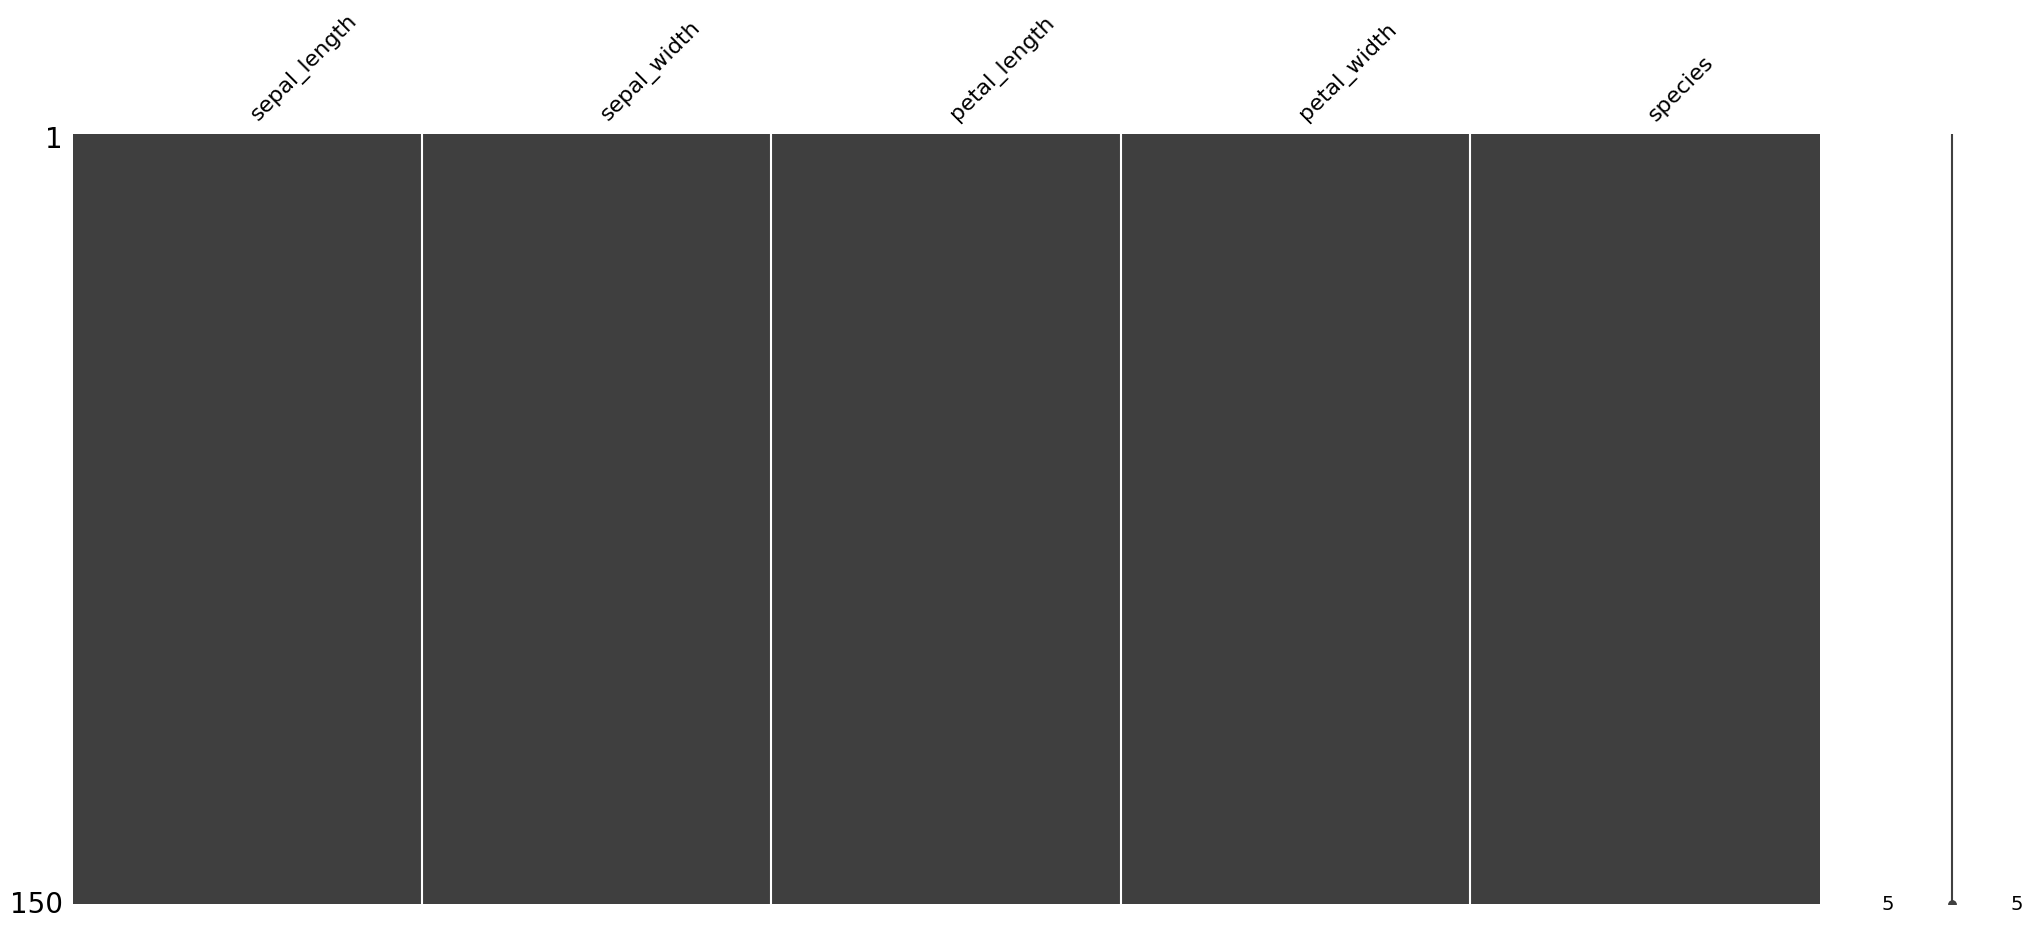

In [50]:
import missingno as msno
msno.matrix(df) # Generate a bar column chart to visually represent the distribution of missing values within the dataset."
#After run the code we can clearly see there is no missing value in DF

In [56]:
df.nunique() #this function is count unique values of each columns in the df.

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [57]:
df.describe() #it give me the desciption of numerical column data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df.describe(include = 'object') #it give me the desciption of objective type of column 

,species
count,150
unique,3
top,setosa
freq,50


In [35]:
df['species'].value_counts() #it will show me the detail and count of species as per their category

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

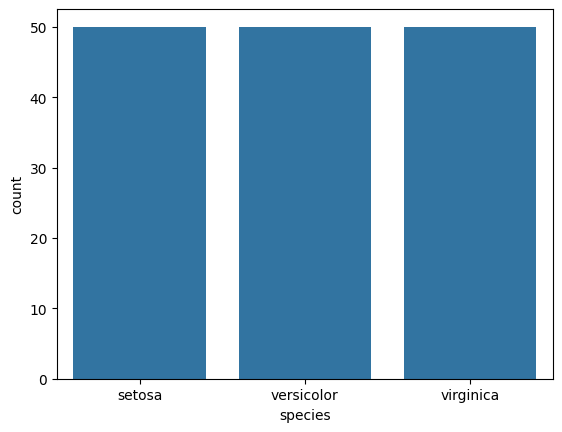

In [32]:
sns.countplot(x=df['species']) #To achieve the same result using Seaborn to visualize the distribution of the 'species' column in the DataFrame.

In [59]:
#Fliter the Data
df[df['sepal_length'] >= 7.0] #show me the detail of only where sepal_length is greater than 7.0

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica


In [37]:
#Group By
df.groupby('species').agg({'sepal_width':['sum', 'max', 'min', 'mean', 'median']}) 
#Above  code groups the 'iris' DataFrame by 'species' and calculates various statistics (sum, max, min, mean, median) for the 'sepal_width' column.

sepal_width                        
                   sum  max  min   mean median
species                                       
setosa           171.4  4.4  2.3  3.428    3.4
versicolor       138.5  3.4  2.0  2.770    2.8
virginica        148.7  3.8  2.2  2.974    3.0

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

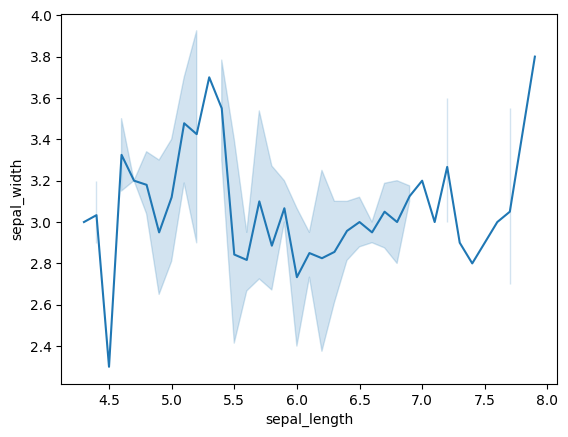

In [45]:
sns.lineplot(df, x='sepal_length', y='sepal_width')

<Axes: xlabel='petal_length', ylabel='petal_width'>

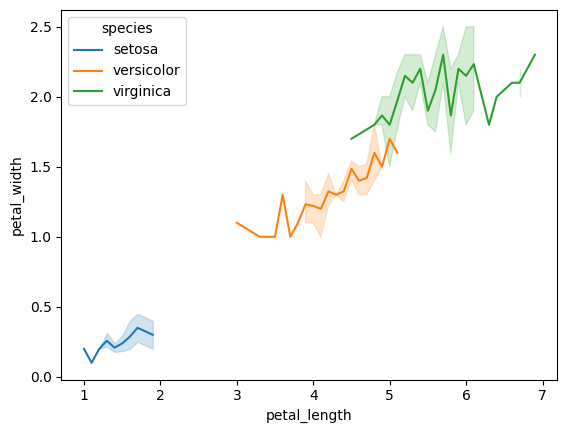

In [43]:
sns.lineplot(df, x='petal_length', y='petal_width', hue='species')

# Step 4 - How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [51]:
# Finding the optimum number of clusters for k-means classification
# Segrgate the independent and dependent features
X = df.drop(['species'],axis=1)
X = X.values

In [52]:
from sklearn.cluster import KMeans

In [53]:
wcss = []                                  # Within Cluster Sum of Squares (WCSS)

for i in range(1, 12):
    KMeans_model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    KMeans_model.fit(X)
    wcss.append(KMeans_model.inertia_)

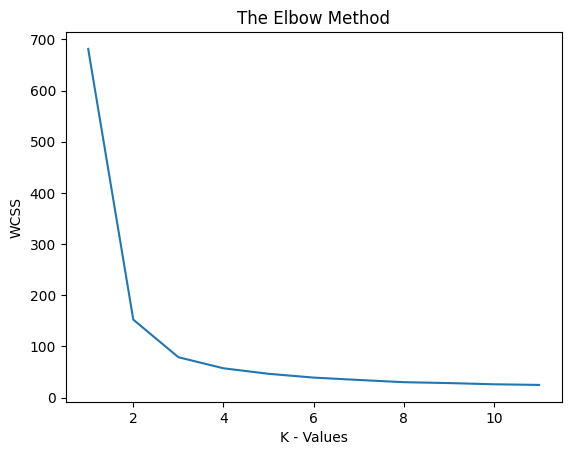

In [132]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('K - Values')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [54]:
# Applying  k means clustering algorithm to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_label = kmeans.fit_predict(X)

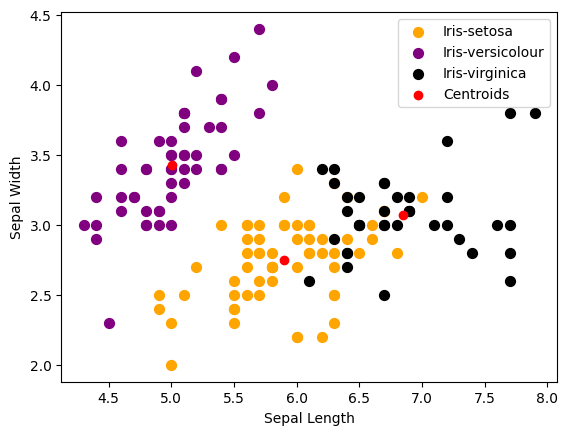

In [55]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_label == 0, 0], X[y_label == 0, 1], s= 50, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 0], X[y_label == 1, 1], s= 50, c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 0], X[y_label == 2, 1], s= 50, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'red', label = 'Centroids')

plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

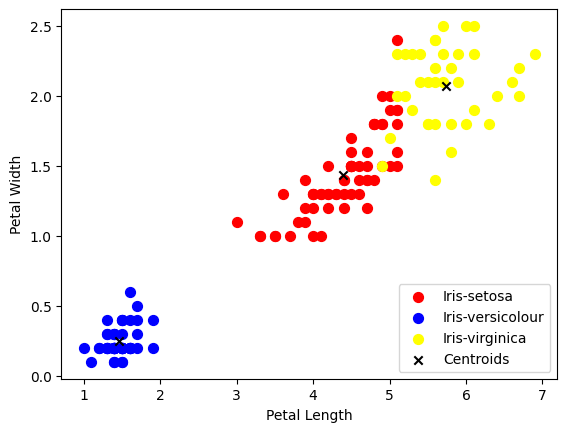

In [51]:
# Visualising the clusters - On the last two columns

plt.scatter(X[y_label == 0, 2], X[y_label == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 2], X[y_label == 1, 3], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 2], X[y_label == 2, -1], s= 50, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            c = 'k', label = 'Centroids', marker = 'x')
            
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Conclusion:

I was able to predict the optimum number of clusters i.e 3 and also visualize them with the help of scatter plot.

# Thank You!